<a href="https://colab.research.google.com/github/MehrdadDastouri/multi_class_classification/blob/main/multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

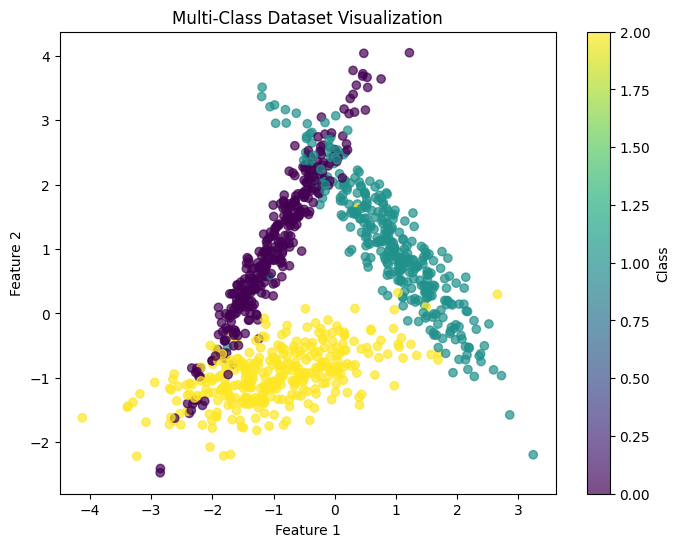

Epoch [20/200], Loss: 0.5425
Epoch [40/200], Loss: 0.3392
Epoch [60/200], Loss: 0.3102
Epoch [80/200], Loss: 0.2972
Epoch [100/200], Loss: 0.2884
Epoch [120/200], Loss: 0.2812
Epoch [140/200], Loss: 0.2739
Epoch [160/200], Loss: 0.2663
Epoch [180/200], Loss: 0.2573
Epoch [200/200], Loss: 0.2400


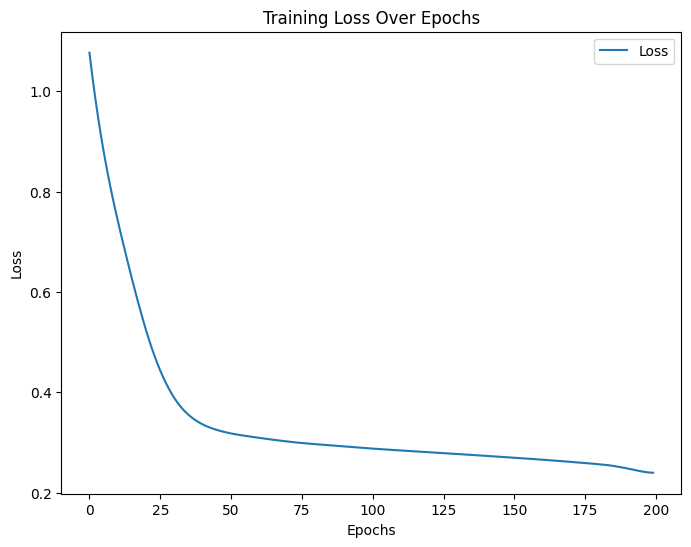

Test Accuracy: 88.00%


In [2]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic multi-class data
X, y = make_classification(
    n_samples=1000,  # Number of samples
    n_features=2,  # Number of features
    n_classes=3,  # Number of classes
    n_informative=2,  # Number of informative features
    n_redundant=0,  # No redundant features
    n_clusters_per_class=1,  # One cluster per class
    random_state=42
)

# Convert data to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)  # Labels for multi-class classification

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", alpha=0.7)
plt.title("Multi-Class Dataset Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()

# Define the neural network model
class MultiClassNet(nn.Module):
    def __init__(self):
        super(MultiClassNet, self).__init__()
        self.hidden = nn.Linear(2, 16)  # Hidden layer with 16 neurons
        self.output = nn.Linear(16, 3)  # Output layer with 3 neurons (for 3 classes)
        self.activation = nn.ReLU()  # ReLU activation function

    def forward(self, x):
        x = self.activation(self.hidden(x))  # Hidden layer + activation
        x = self.output(x)  # Output layer (no activation here, as CrossEntropyLoss applies Softmax)
        return x

# Initialize the model
model = MultiClassNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer

# Training the model
epochs = 200
losses = []
for epoch in range(epochs):
    # Forward pass: predict outputs
    y_pred = model(X_train)
    # Compute the loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    # Update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 20 epochs
    if (epoch + 1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Plot the training loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Evaluate the model on the test set
with torch.no_grad():
    y_test_pred = model(X_test)
    y_test_pred_classes = torch.argmax(y_test_pred, axis=1)

# Calculate accuracy
accuracy = (y_test_pred_classes == y_test).sum().item() / y_test.size(0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Visualize the decision boundaries
with torch.no_grad():
    xx, yy = torch.meshgrid(
        torch.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100),
        torch.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100),
    )
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid)
    predicted_classes = torch.argmax(predictions, axis=1).reshape(xx.shape)